In [33]:
from selenium import webdriver
driver = webdriver.Chrome('../driver/chromedriver.exe')

In [34]:
import time
driver.get('https://www.instagram.com')
time.sleep(2)

In [35]:
email = 'd' #id
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
input_id.clear()
input_id.send_keys(email)

password = 'd' #pw
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()
time.sleep(3)

In [36]:
def insta_searching(word):
    
    url = 'https://www.instagram.com/explore/tags/' + word
    return url 

In [37]:
word = "쿠킹박스"
url = insta_searching(word)
driver.get(url)

In [38]:
def select_first(driver):
    first = driver.find_element_by_css_selector("div._9AhH0")
    first.click()
    time.sleep(3)
    
select_first(driver)

In [39]:
import re
from bs4 import BeautifulSoup
import unicodedata

def get_content(driver):
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    
# 1. 본문내용가져오기
    try:
        content = soup.select('div.C4VMK > span')[0].text
        content = unicodedata.normalize('NFC', content)       
    except: 
        content = ' '
    
# 2. 본문 내용에서 해시태그 가져오기(정규식 활용)
    tags = re.findall(r'#[^\s#,\\]+', content)  
    
# 3. 작성일자 가져오기
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
    
# 4. 좋아요 수 가져오기
    try:
        like = soup.select('div.Nm9Fw > button')[0].text[4:-1]   
    except:
        like = 0
        
# 5. 위치정보 가져오기
    try: 
        place = soup.select('div.M30cS')[0].text
        place = unicodedata.normalize('NFC', place)
    except:
        place = ''
    
# 수집한 정보 저장하기
    data = [content, date, like, place, tags]
    return data

get_content(driver)

['[#EVENT] 집에서 즐기는 #남도분식 🤩남녀노소 좋아하는 떡볶이에고소한 들깨 시래기볶음이 풍덩-!.갖가지 모둠튀김과 양파 장아찌를 상추튀김에 올려시래기 떡볶이와 한 입에 넣어주면 금상첨화✨.☝당신의 튀김 취향은 무엇인가요?[상추에 #싸먹 VS 떡볶이에 #찍먹]댓글에 친구 태그 & 튀김 취향을 알려주세요!추첨을 통해 시래기떡볶이 제품을 드립니다😎✔ 기간: 11/24~11/26✔ 발표: 11/27✔ 경품: 심플리쿡 시래기떡볶이&상추튀김 (2명)',
 '2020-11-24',
 '1,216',
 '',
 ['#EVENT]', '#남도분식', '#싸먹', '#찍먹]댓글에']]

In [40]:
def move_next(driver):

    right = driver.find_element_by_css_selector ('a.coreSpriteRightPaginationArrow')
    right.click()
    time.sleep(3)

move_next(driver)

## 인스타: 밀키트, 밀키트 추천 , 쿠킹박스, 홈파티음식

In [ ]:

target = 500   

for i in range(target):
    try:
        data = get_content(driver)
        results.append(data)
        move_next(driver)
    except:
        time.sleep(10)
        move_next(driver)

In [44]:
import pandas as pd

results_df = pd.DataFrame(results)
results_df.columns = ['content','data','like','place','tags']
results_df.to_excel('../data/crawling_cookingbox2.xlsx')

In [45]:
homeparty = pd.read_excel('../data/crawling_cookingbox1.xlsx')
homeparty

,Unnamed: 0,content,data,like,place,tags
0,0,[#EVENT] 집에서 즐기는 #남도분식 🤩남녀노소 좋아하는 떡볶이에고소한 들깨 시...,2020-11-24,"1,216",NaN,"['#EVENT]', '#남도분식', '#싸먹', '#찍먹]댓글에']"
1,1,📢 EVENT맛수러움 #칠리새우 #체험단 모집💚신제품 밀키트가 드디어 출시됐어요!만...,2020-11-18,316,NaN,"['#칠리새우', '#체험단']"
2,2,"춥지만 설레는 연말 , 다들 잘 보내고 계신지요 🙂근사한 곳에서 식사 하고 싶지만 ...",2020-12-15,"1,334",NaN,[]
3,3,"#유료광고 #신짱키친 🔥기승전골(대창,순대,소고기)오늘 저녁은 부산에서 줄서서 먹는...",2020-12-08,"8,961",NaN,"['#유료광고', '#신짱키친', '#기승전골', '#부산맛집', '#밀키트', '..."
4,4,이탈리아에 계시는 할머니 손맛이 느껴지는 가정식 밀키트메이드의 홈파티 밀키트 ‘볼로...,2020-11-12,"1,302",압구정 MADE,[]
...,...,...,...,...,...,...
495,495,#협찬 #집밥그램.생선조림은 양념이 어려워서 잘 안하는데세트로 다 오니까 쉽게 만들...,2020-12-06,261,NaN,"['#협찬', '#집밥그램.생선조림은', '#가자미조림', '#가자미', '#가자미..."
496,496,오동통 쫄깃한 🔥오동주꾸미🔥-최상급 주꾸미 주꾸미만 사용합니다👍-🚩구매좌표 ▶️ 프...,2020-12-05,0,NaN,[]
497,497,.가게 옮긴다고 고민이 많은 요즘 지금 이 순간 만큼은 모든 근심이 사라진다. 역시...,2020-12-05,241,레트로 정육점 담다.,"['#불멍', '#코로나', '#일상', '#데일리', '#좋아요', '#좋반', ..."
498,498,"포레스트아웃띵 ㅎㅎ야구 끝나고 한번가본 식사,커피,빵집인테리어 분위기 넘 좋긴한데 ...",2020-12-05,28,NaN,"['#친절한기웅씨', '#쿠킹박스', '#밀키트', '#홈쿡', '#간편식품', '..."


In [46]:
homeparty1 = pd.read_excel('../data/crawling_cookingbox2.xlsx')
homeparty1

,Unnamed: 0,content,data,like,place,tags
0,0,[#EVENT] 집에서 즐기는 #남도분식 🤩남녀노소 좋아하는 떡볶이에고소한 들깨 시...,2020-11-24,"1,216",NaN,"['#EVENT]', '#남도분식', '#싸먹', '#찍먹]댓글에']"
1,1,📢 EVENT맛수러움 #칠리새우 #체험단 모집💚신제품 밀키트가 드디어 출시됐어요!만...,2020-11-18,316,NaN,"['#칠리새우', '#체험단']"
2,2,"춥지만 설레는 연말 , 다들 잘 보내고 계신지요 🙂근사한 곳에서 식사 하고 싶지만 ...",2020-12-15,"1,334",NaN,[]
3,3,"#유료광고 #신짱키친 🔥기승전골(대창,순대,소고기)오늘 저녁은 부산에서 줄서서 먹는...",2020-12-08,"8,961",NaN,"['#유료광고', '#신짱키친', '#기승전골', '#부산맛집', '#밀키트', '..."
4,4,이탈리아에 계시는 할머니 손맛이 느껴지는 가정식 밀키트메이드의 홈파티 밀키트 ‘볼로...,2020-11-12,"1,302",압구정 MADE,[]
...,...,...,...,...,...,...
693,693,#협찬 #더쟁반 #밀키트 로 브런치메뉴 해결👍 @thejaengban_officia...,2020-11-27,"1,278",NaN,"['#협찬', '#더쟁반', '#밀키트', '#간편요리', '#쿠킹박스', '#집밥..."
694,694,⠀⠀🔊 애호박의 달큰함과 오동통한 새우가 만났다구요〰️❗⠀⠀왕새우가 들어가 고소하게...,2020-11-27,65,셰프의레시피,"['#mealkit', '#밀키트', '#밀키트전문', '#cookingbox', ..."
695,695,💚쿡킷패밀리 7차 모집💚쿡킷을 직접 체험하고 소개해주실 #쿡킷패밀리 를 모집합니다🎉...,2020-11-27,0,NaN,"['#쿡킷패밀리', '#쿡킷', '#CJ쿡킷', '#쿡킷패밀리', '#랜선시식', ..."
696,696,#협찬 이지만 난 #진심일세 💕#감바스 이건 올리브오일을 뭘 쓰냐에 따라 맛이 달라...,2020-11-27,565,NaN,"['#협찬', '#진심일세', '#감바스', '#더쟁반', '#감바스알하이요', '..."


In [47]:
crawling_cookingbox = pd.concat([homeparty1,homeparty])
crawling_cookingbox

,Unnamed: 0,content,data,like,place,tags
0,0,[#EVENT] 집에서 즐기는 #남도분식 🤩남녀노소 좋아하는 떡볶이에고소한 들깨 시...,2020-11-24,"1,216",NaN,"['#EVENT]', '#남도분식', '#싸먹', '#찍먹]댓글에']"
1,1,📢 EVENT맛수러움 #칠리새우 #체험단 모집💚신제품 밀키트가 드디어 출시됐어요!만...,2020-11-18,316,NaN,"['#칠리새우', '#체험단']"
2,2,"춥지만 설레는 연말 , 다들 잘 보내고 계신지요 🙂근사한 곳에서 식사 하고 싶지만 ...",2020-12-15,"1,334",NaN,[]
3,3,"#유료광고 #신짱키친 🔥기승전골(대창,순대,소고기)오늘 저녁은 부산에서 줄서서 먹는...",2020-12-08,"8,961",NaN,"['#유료광고', '#신짱키친', '#기승전골', '#부산맛집', '#밀키트', '..."
4,4,이탈리아에 계시는 할머니 손맛이 느껴지는 가정식 밀키트메이드의 홈파티 밀키트 ‘볼로...,2020-11-12,"1,302",압구정 MADE,[]
...,...,...,...,...,...,...
495,495,#협찬 #집밥그램.생선조림은 양념이 어려워서 잘 안하는데세트로 다 오니까 쉽게 만들...,2020-12-06,261,NaN,"['#협찬', '#집밥그램.생선조림은', '#가자미조림', '#가자미', '#가자미..."
496,496,오동통 쫄깃한 🔥오동주꾸미🔥-최상급 주꾸미 주꾸미만 사용합니다👍-🚩구매좌표 ▶️ 프...,2020-12-05,0,NaN,[]
497,497,.가게 옮긴다고 고민이 많은 요즘 지금 이 순간 만큼은 모든 근심이 사라진다. 역시...,2020-12-05,241,레트로 정육점 담다.,"['#불멍', '#코로나', '#일상', '#데일리', '#좋아요', '#좋반', ..."
498,498,"포레스트아웃띵 ㅎㅎ야구 끝나고 한번가본 식사,커피,빵집인테리어 분위기 넘 좋긴한데 ...",2020-12-05,28,NaN,"['#친절한기웅씨', '#쿠킹박스', '#밀키트', '#홈쿡', '#간편식품', '..."


In [56]:
len(crawling_cookingbox['content'].unique())

691

In [58]:
crawling_cookingbox.to_excel('../data/crawling_cookingbox.xlsx')

In [59]:
driver.close()

In [9]:
import pandas as pd

insta_kn = pd.DataFrame( [ ] )

f_list = ['../data/crawling_mealkit.xlsx',
          '../data/crawling_mealkit_recomm.xlsx',
          '../data/crawling_homeparty_foods.xlsx',
          '../data/crawling_cookingbox.xlsx']
          
for fname in f_list:
    fpath = fname
    print(fpath)
    temp = pd.read_excel(fpath)
    insta_kn = insta_kn.append(temp)

insta_kn.columns =['index','content','date','like','place','tags','']

../data/crawling_mealkit.xlsx
../data/crawling_mealkit_recomm.xlsx
../data/crawling_homeparty_foods.xlsx
../data/crawling_cookingbox.xlsx


In [14]:
insta_kn

,index,content,date,like,place,tags,
0,0,"3년전 본사앞 -♡출산하며 찐살 30키로 감량,88사이즈에서 55로 줄이면서자존감도...",2020-12-21,118,NaN,"['#홍여우', '#홍여우사업지금은', '#디톡스다이어트', '#디톡스', '#밀키...",NaN
1,1,".오늘저녁은 곱창 파티파티🎉곱창,대창,염통 한우 모듬세트로✌️환상의조합으로 다양하게...",2020-12-20,"1,104",NaN,"['#곱창', '#대창', '#염통', '#대성축산', '#캠핑저녁', '#캠핑메뉴...",NaN
2,2,@eat_sujin.imddong 님 감사합니다^^ #인생식탁 #협찬여행도 못 다...,2020-12-19,"1,384",NaN,"['#인생식탁', '#협찬여행도', '#꿀빵', '#인생식탁👉', '#간식', '#...",NaN
3,3,추운날 집에서 매콤한게 땡길때 🔥낙곱새전골🔥헤헿ㅎㅎ..야무지게 🍚까지 비벼먹어야지✌...,2020-12-17,"1,884",NaN,"['#낙곱새', '#낙곱새전골', '#밀키트', '#배고파그램']",NaN
4,4,#일상 잇님들 저녁 드실준비하시나요나윤이네는 오늘 밀푀유나베 먹어요🙂밀키트로 간편히...,2020-12-21,206,NaN,['#일상'],NaN
...,...,...,...,...,...,...,...
4190,495,#협찬 #집밥그램.생선조림은 양념이 어려워서 잘 안하는데세트로 다 오니까 쉽게 만들...,2020-12-06,261,NaN,"['#협찬', '#집밥그램.생선조림은', '#가자미조림', '#가자미', '#가자미...",495.0
4191,496,오동통 쫄깃한 🔥오동주꾸미🔥-최상급 주꾸미 주꾸미만 사용합니다👍-🚩구매좌표 ▶️ 프...,2020-12-05,0,NaN,[],496.0
4192,497,.가게 옮긴다고 고민이 많은 요즘 지금 이 순간 만큼은 모든 근심이 사라진다. 역시...,2020-12-05,241,레트로 정육점 담다.,"['#불멍', '#코로나', '#일상', '#데일리', '#좋아요', '#좋반', ...",497.0
4193,498,"포레스트아웃띵 ㅎㅎ야구 끝나고 한번가본 식사,커피,빵집인테리어 분위기 넘 좋긴한데 ...",2020-12-05,28,NaN,"['#친절한기웅씨', '#쿠킹박스', '#밀키트', '#홈쿡', '#간편식품', '...",498.0


In [13]:
insta_kn = insta_kn.reset_index(drop=True,inplace=False)

In [16]:
del insta_kn['index']

In [17]:
del insta_kn['']

In [18]:
insta_kn

,content,date,like,place,tags
0,"3년전 본사앞 -♡출산하며 찐살 30키로 감량,88사이즈에서 55로 줄이면서자존감도...",2020-12-21,118,NaN,"['#홍여우', '#홍여우사업지금은', '#디톡스다이어트', '#디톡스', '#밀키..."
1,".오늘저녁은 곱창 파티파티🎉곱창,대창,염통 한우 모듬세트로✌️환상의조합으로 다양하게...",2020-12-20,"1,104",NaN,"['#곱창', '#대창', '#염통', '#대성축산', '#캠핑저녁', '#캠핑메뉴..."
2,@eat_sujin.imddong 님 감사합니다^^ #인생식탁 #협찬여행도 못 다...,2020-12-19,"1,384",NaN,"['#인생식탁', '#협찬여행도', '#꿀빵', '#인생식탁👉', '#간식', '#..."
3,추운날 집에서 매콤한게 땡길때 🔥낙곱새전골🔥헤헿ㅎㅎ..야무지게 🍚까지 비벼먹어야지✌...,2020-12-17,"1,884",NaN,"['#낙곱새', '#낙곱새전골', '#밀키트', '#배고파그램']"
4,#일상 잇님들 저녁 드실준비하시나요나윤이네는 오늘 밀푀유나베 먹어요🙂밀키트로 간편히...,2020-12-21,206,NaN,['#일상']
...,...,...,...,...,...
4190,#협찬 #집밥그램.생선조림은 양념이 어려워서 잘 안하는데세트로 다 오니까 쉽게 만들...,2020-12-06,261,NaN,"['#협찬', '#집밥그램.생선조림은', '#가자미조림', '#가자미', '#가자미..."
4191,오동통 쫄깃한 🔥오동주꾸미🔥-최상급 주꾸미 주꾸미만 사용합니다👍-🚩구매좌표 ▶️ 프...,2020-12-05,0,NaN,[]
4192,.가게 옮긴다고 고민이 많은 요즘 지금 이 순간 만큼은 모든 근심이 사라진다. 역시...,2020-12-05,241,레트로 정육점 담다.,"['#불멍', '#코로나', '#일상', '#데일리', '#좋아요', '#좋반', ..."
4193,"포레스트아웃띵 ㅎㅎ야구 끝나고 한번가본 식사,커피,빵집인테리어 분위기 넘 좋긴한데 ...",2020-12-05,28,NaN,"['#친절한기웅씨', '#쿠킹박스', '#밀키트', '#홈쿡', '#간편식품', '..."


In [20]:
insta_kn.drop_duplicates(subset = ["content"], inplace = True)
print(insta_kn)
insta_kn.to_excel('../data/crawling_insta_kn.xlsx', index = False)

                                                content        date   like  \
0     3년전 본사앞 -♡출산하며 찐살 30키로 감량,88사이즈에서 55로 줄이면서자존감도...  2020-12-21    118   
1     .오늘저녁은 곱창 파티파티🎉곱창,대창,염통 한우 모듬세트로✌️환상의조합으로 다양하게...  2020-12-20  1,104   
2     @eat_sujin.imddong 님 감사합니다^^  #인생식탁 #협찬여행도 못 다...  2020-12-19  1,384   
3     추운날 집에서 매콤한게 땡길때 🔥낙곱새전골🔥헤헿ㅎㅎ..야무지게 🍚까지 비벼먹어야지✌...  2020-12-17  1,884   
4     #일상 잇님들 저녁 드실준비하시나요나윤이네는 오늘 밀푀유나베 먹어요🙂밀키트로 간편히...  2020-12-21    206   
...                                                 ...         ...    ...   
3690  #협찬 #더쟁반 #밀키트 로 브런치메뉴 해결👍 @thejaengban_officia...  2020-11-27  1,278   
3691  ⠀⠀🔊 애호박의 달큰함과 오동통한 새우가 만났다구요〰️❗⠀⠀왕새우가 들어가 고소하게...  2020-11-27     65   
3692  💚쿡킷패밀리 7차 모집💚쿡킷을 직접 체험하고 소개해주실 #쿡킷패밀리 를 모집합니다🎉...  2020-11-27      0   
3693  #협찬 이지만 난 #진심일세 💕#감바스 이건 올리브오일을 뭘 쓰냐에 따라 맛이 달라...  2020-11-27    565   
3694  우리 고객님께서 반주로 저희 #오동주꾸미를 찾아주셨어요😁 ⁣⁣사진만봐도 정말 맛스럽...  2020-11-27     26   

       place                                               tags

In [21]:
len(insta_kn)

2879

In [31]:
fresheasy = insta_kn['content'].str.contains('프레시지|fresheasy|Fresheasy|FRESHEASY|프레시이지')
fresh_count = insta_kn[fresheasy]
len(fresh_count)

76

In [32]:
round(74/2879*100,2)

2.57

In [1]:
from matplotlib import font_manager, rc

f_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = f_path).get_name()
rc('font', family = font_name)

%matplotlib inline
import matplotlib.pyplot as plt

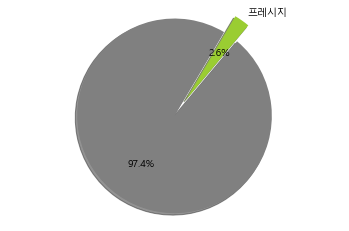

In [5]:
labels = '프레시지',' '
sizes = [2.6,97.4]
colors = ['yellowgreen','grey']
explode = (0,0.2)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',shadow =True, startangle = 410)
plt.axis('equal')
plt.show()